# Time Series Prediction


## Introduction

Predicting time series data is useful for a variety of business applications. Companies forecast time series data in order to forecast sales, manage their supply chains, and more.

LSTMs are commonly used for time series prediction because they are able to learn the underlying patterns of time series data. 

In this exercise, we will use an LSTM to forecast the data from a random timeseries by training it on the timeseries.

## Instructions

You can begin forecasting trends with LSTMs with the following steps:

1. Generate your timeseries data in Numpy
2. Load the data into PyTorch
3. Train your model on the data
4. Run the model to predict the next steps in the time series.

## Example Code

<b> Generate X, Y data </b>

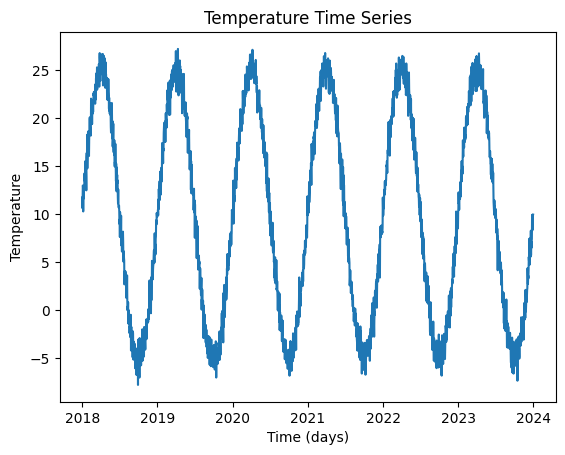

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate a fake temperature dataset with cyclic patterns
np.random.seed(0)
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2023-12-31')
date_range = pd.date_range(start_date, end_date)

# Define a function to generate cyclic temperature data
def generate_cyclic_temperature_data(date_range):
    num_points = len(date_range)
    # Create a cyclic pattern using a sine wave
    temperature_data = 15 * np.sin(2 * np.pi * np.arange(num_points) / 365) + 10
    # Add some random noise
    temperature_data += np.random.normal(0, 1, num_points)
    # Ensure temperatures stay within a reasonable range
    temperature_data = np.clip(temperature_data, -10, 30)
    return temperature_data

# Generate the cyclic temperature dataset
temperature_data = generate_cyclic_temperature_data(date_range)
# Create a DataFrame to store the data
df = pd.DataFrame({'Date': date_range, 'Temperature': temperature_data})

# Plot the temperature data
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Temperature'])
plt.xlabel('Time (days)')
plt.ylabel('Temperature')
plt.title('Temperature Time Series')
plt.show()

<b> Create an LSTM Model </b>

In [2]:
# Define a function to create sequences of data with a given sequence length
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length + 1]  # Include one extra data point for prediction
        sequences.append(seq)
    return sequences

# Define hyperparameters
sequence_length = 7
batch_size = 64
epochs = 30
learning_rate = 0.001

# Split the dataset into training and testing sets
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]['Temperature'].values
test_data = df.iloc[train_size:]['Temperature'].values

# Create sequences for training and testing
train_sequences = create_sequences(train_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)
print(pd.DataFrame(train_sequences).head(4))
# Convert sequences to PyTorch tensors
train_sequences = torch.tensor(train_sequences, dtype=torch.float32)
test_sequences = torch.tensor(test_sequences, dtype=torch.float32)

print(train_sequences.shape)



           0          1          2          3          4          5  \
0  11.764052  10.658358  11.495062  13.015188  12.899594  10.312194   
1  10.658358  11.495062  13.015188  12.899594  10.312194  12.496614   
2  11.495062  13.015188  12.899594  10.312194  12.496614  11.651763   
3  13.015188  12.899594  10.312194  12.496614  11.651763  11.955963   

           6          7  
0  12.496614  11.651763  
1  11.651763  11.955963  
2  11.955963  12.725231  
3  12.725231  12.713441  
torch.Size([1745, 8])


/tmp/ipykernel_3760645/3764277226.py:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  train_sequences = torch.tensor(train_sequences, dtype=torch.float32)


In the LSTM model, the input size refers to the number of features or dimensions in the input data that you are using to make predictions. In the provided code, we are predicting daily temperatures, and we are using only one feature, which is the temperature itself.

In this specific case, the input size is 1 because we are using the previous 7 days' temperatures as input to predict the temperature for the next day. Each input sequence consists of a sequence of temperatures, and each temperature value is a single feature. Therefore, the input size is 1 because we are using only one feature (temperature) to make predictions.

If you had additional features, such as humidity, wind speed, or other weather-related variables, you would increase the input size accordingly to include those features in your input data. For example, if you had three features (temperature, humidity, and wind speed), the input size would be 3. In our case, since we are using only temperature as the input feature, the input size is 1.

In [3]:

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Initialize the model
input_size = 1  # Temperature data
hidden_size = 64  # Number of LSTM units
output_size = 1  # Predicted temperature
model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# Training the model
train_loss_history = []



Epoch [1/30] - Loss: 210.2396
Epoch [2/30] - Loss: 173.2404
Epoch [3/30] - Loss: 127.3911
Epoch [4/30] - Loss: 93.9196
Epoch [5/30] - Loss: 72.2760
Epoch [6/30] - Loss: 57.7889
Epoch [7/30] - Loss: 47.1400
Epoch [8/30] - Loss: 38.8311
Epoch [9/30] - Loss: 32.2025
Epoch [10/30] - Loss: 26.8463
Epoch [11/30] - Loss: 22.4816
Epoch [12/30] - Loss: 18.9065
Epoch [13/30] - Loss: 15.9703
Epoch [14/30] - Loss: 13.5545
Epoch [15/30] - Loss: 11.5627
Epoch [16/30] - Loss: 9.9161
Epoch [17/30] - Loss: 8.5510
Epoch [18/30] - Loss: 7.4160
Epoch [19/30] - Loss: 6.4703
Epoch [20/30] - Loss: 5.6811
Epoch [21/30] - Loss: 5.0210
Epoch [22/30] - Loss: 4.4678
Epoch [23/30] - Loss: 4.0033
Epoch [24/30] - Loss: 3.6128
Epoch [25/30] - Loss: 3.2842
Epoch [26/30] - Loss: 3.0075
Epoch [27/30] - Loss: 2.7744
Epoch [28/30] - Loss: 2.5778
Epoch [29/30] - Loss: 2.4120
Epoch [30/30] - Loss: 2.2718


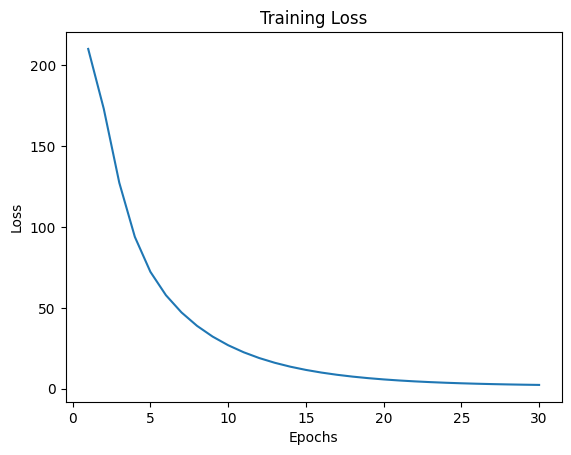

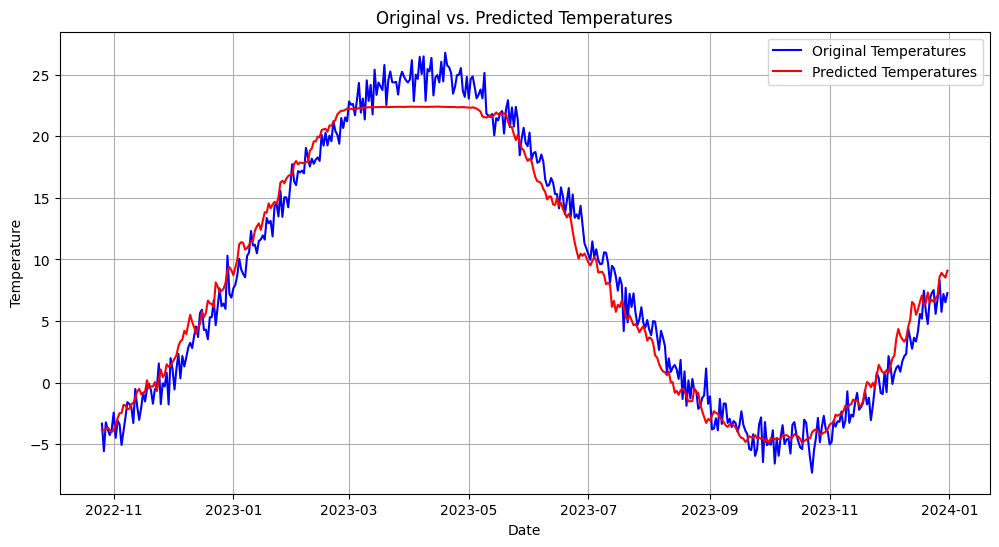

In [4]:
for epoch in range(epochs):
    epoch_loss = 0.0  # Initialize epoch loss
    for i in range(0, len(train_sequences), batch_size):
        inputs = train_sequences[i:i + batch_size, :-1]  # Input sequence
        labels = train_sequences[i:i + batch_size, -1]   # Target (next day's temperature)

        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(-1))  # Add an extra dimension for input
        loss = criterion(outputs.squeeze(), labels)  # Squeeze to match the shape
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()  # Accumulate loss for the epoch
    
    # Calculate and store the average loss for the epoch
    average_epoch_loss = epoch_loss / (len(train_sequences) / batch_size)
    train_loss_history.append(average_epoch_loss)

    # Print the epoch loss
    print(f'Epoch [{epoch + 1}/{epochs}] - Loss: {average_epoch_loss:.4f}')

# Plot training loss
plt.plot(range(1, (epochs*1) + 1), train_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# ...

# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    test_inputs = test_sequences[:, :-1]
    predicted_temperatures = model(test_inputs.unsqueeze(-1)).squeeze().numpy()

# Extract the test date range for plotting
test_date_range = df['Date'][train_size + sequence_length:]

# Plot original and predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(test_date_range, test_data[:len(test_date_range)], label='Original Temperatures', color='blue')
plt.plot(test_date_range, predicted_temperatures[:len(test_date_range)], label='Predicted Temperatures', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original vs. Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()

let's use a simple example to clarify the concepts of input size and sequence length when data is fed into an LSTM network.

Example Scenario: Predicting Daily Stock Prices

Suppose we want to predict the closing stock price of a company based on the following data:

Daily closing stock price (the feature we are using for prediction).
Daily trading volume (another feature, separate from the closing price).
Input Size: This represents the number of features or variables used to make predictions. In our example, we have two features: closing stock price and trading volume. Therefore, the input size is 2.

Sequence Length: This determines how many time steps or historical data points the LSTM model considers when making predictions. Let's say we want to use the previous 5 days' data to predict the next day's closing price. In this case, the sequence length is 5.

Here's how the data would be structured for the LSTM model:

Let's assume we have 20 days of historical data for our example.

<pre>
    Day 1: [Closing Price 1, Volume 1]
    Day 2: [Closing Price 2, Volume 2]
    Day 3: [Closing Price 3, Volume 3]
    Day 4: [Closing Price 4, Volume 4]
    Day 5: [Closing Price 5, Volume 5]
    Day 6: [Closing Price 6, Volume 6]
    Day 7: [Closing Price 7, Volume 7]
    Day 8: [Closing Price 8, Volume 8]
    Day 9: [Closing Price 9, Volume 9]
    Day 10: [Closing Price 10, Volume 10]
    Day 11: [Closing Price 11, Volume 11]
    Day 12: [Closing Price 12, Volume 12]
    Day 13: [Closing Price 13, Volume 13]
    Day 14: [Closing Price 14, Volume 14]
    Day 15: [Closing Price 15, Volume 15]
    Day 16: [Closing Price 16, Volume 16]
    Day 17: [Closing Price 17, Volume 17]
    Day 18: [Closing Price 18, Volume 18]
    Day 19: [Closing Price 19, Volume 19]
    Day 20: [Closing Price 20, Volume 20]
</pre>
Now, we create sequences with the specified sequence length (5 days) for input to the LSTM model:

<pre>
Sequence 1: [Day 1, Day 2, Day 3, Day 4, Day 5]
Sequence 2: [Day 2, Day 3, Day 4, Day 5, Day 6]
Sequence 3: [Day 3, Day 4, Day 5, Day 6, Day 7]
...
Sequence 16: [Day 16, Day 17, Day 18, Day 19, Day 20]
</pre>
Each sequence contains 5 days' worth of data, where each day has 2 features (closing price and volume). These sequences are fed into the LSTM model for training and prediction.

So, in summary:

Input Size: 2 (closing price and volume)
Sequence Length: 5 (5 days of historical data)

## Compare to Linear Regression

Mean Squared Error (LSTM): 1.94
Mean Squared Error (Linear Regression): 1.35


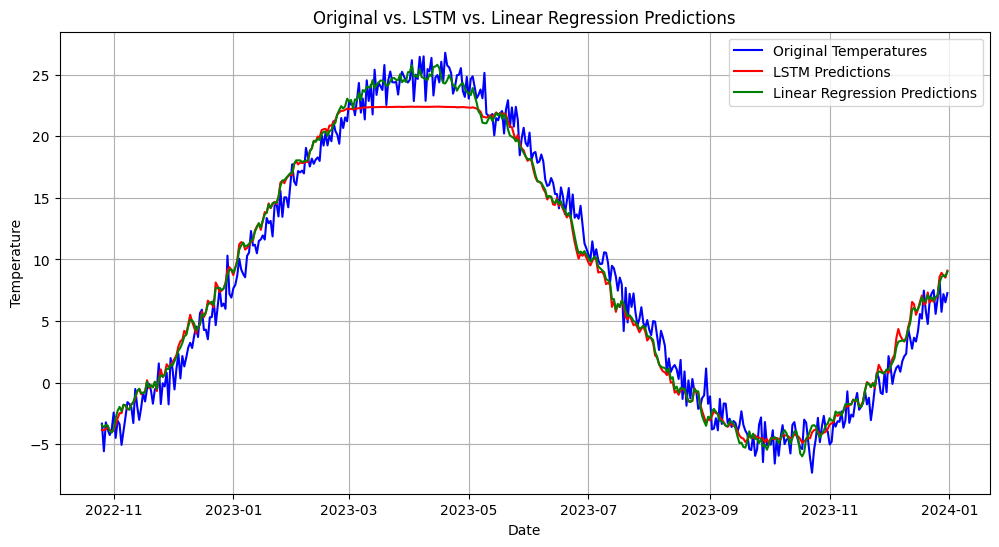

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Linear Regression Model
# Prepare data for Linear Regression
X_train = train_sequences[:, :-1].numpy()
y_train = train_sequences[:, -1].numpy()
X_test = test_sequences[:, :-1].numpy()
y_test = test_sequences[:, -1].numpy()

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions using Linear Regression
predicted_temperatures_linear = linear_model.predict(X_test)

# Calculate the mean squared error for both models
mse_lstm = mean_squared_error(y_test, predicted_temperatures)
mse_linear = mean_squared_error(y_test, predicted_temperatures_linear)

print(f'Mean Squared Error (LSTM): {mse_lstm:.2f}')
print(f'Mean Squared Error (Linear Regression): {mse_linear:.2f}')

# Plot original, LSTM, and Linear Regression predictions on the same plot
plt.figure(figsize=(12, 6))
plt.plot(test_date_range, test_data[:len(test_date_range)], label='Original Temperatures', color='blue')
plt.plot(test_date_range, predicted_temperatures[:len(test_date_range)], label='LSTM Predictions', color='red')
plt.plot(test_date_range, predicted_temperatures_linear[:len(test_date_range)], label='Linear Regression Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original vs. LSTM vs. Linear Regression Predictions')
plt.legend()
plt.grid(True)
plt.show()